In [1]:
!git clone https://github.com/statsbomb/open-data.git

Cloning into 'open-data'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (600/600), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 6950 (delta 519), reused 407 (delta 326), pack-reused 6350
Receiving objects: 100% (6950/6950), 729.86 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (6161/6161), done.
Checking out files: 100% (1273/1273), done.


In [0]:
#edit only this tab
#give the folder path of the match
path = "/content/open-data/data/events/"
home_team = 'Espanyol'
away_team = 'Barcelona'

In [85]:
import PIL
import imageio
from IPython import display
import json
import os
import codecs
from pandas.io.json import json_normalize
import numpy as np
#import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
#import squarify
from functools import reduce

Xg_req = pd.DataFrame(data=None)
for filename in (os.listdir(path)):
   #print(filename)
  filename = '69275.json' # remove the comment line to work for this match
with codecs.open("%s" % path + filename,encoding='utf-8') as data_file:    
    data = json.load(data_file)
    df = pd.DataFrame(data=None)
        
    df = json_normalize(data, sep = "_")
        
        #df =  df[(df['type_name'] == "Shot")]
        #df = df.loc[:,['location','shot_body_part_id','shot_end_location','shot_one_on_one','shot_technique_id','shot_type_id','under_pressure','shot_outcome_id']]
        #print(df.shape)
Xg_req = Xg_req.append(df,ignore_index=True,sort=False)
        #df.drop(df.index, inplace=True)
        
print("done")
df = Xg_req

done


In [0]:
#type_id=30 is pass event AND type_id=19 is substitution event

pass_m = df.query('type_id == 30')
substitution = df.query('type_id == 19')
#pass_m = df.query('type_name == pass')


In [87]:
#this cell is WIP
substitution_home = set()
substitution_home = substitution[substitution.team_name == home_team]
substitution_home = substitution_home['substitution_replacement_name'].unique()
substitution_away = set()
substitution_away = substitution[substitution.team_name == away_team]
substitution_away = substitution_away['substitution_replacement_name'].unique()
print(substitution_away)
print(substitution_home)

['Javier Alejandro Mascherano' 'Seydou Kéita' 'Bojan Krkíc Pérez']
['Jesús Alberto Dátolo' 'Jordi Amat Maas' 'David García De La Cruz']


In [0]:
# to get 

home_player = pass_m[(pass_m.team_name == home_team)] 
home_team_list = set()
home_team_list = home_player['player_name'].unique()
#print(substitution_belgium)
#belgium_list = [player for player in belgium_list if player not in substitution_belgium]
#belgium_list.remove([x for x in substitution_belgium])#belgium_list - substitution_belgium
home_player =pass_m['player_name'].isin(home_team_list)
pass_home = pass_m[home_player] #contains 11 players of home team

away_player = pass_m[(pass_m.team_name == away_team)] 
away_list = away_player['player_name'].unique()
#away_list = away_list - substitution_brazil
away_player = pass_m['player_name'].isin(away_list)
pass_away = pass_m[away_player]

In [89]:
pass_home.head()

,50_50_outcome_id,50_50_outcome_name,bad_behaviour_card_id,bad_behaviour_card_name,ball_receipt_outcome_id,ball_receipt_outcome_name,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part_id,clearance_body_part_name,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome_id,dribble_outcome_name,dribble_overrun,duel_outcome_id,duel_outcome_name,duel_type_id,duel_type_name,duration,foul_committed_advantage,foul_committed_card_id,foul_committed_card_name,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,foul_won_advantage,foul_won_defensive,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_end_location,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_position_id,...,period,play_pattern_id,play_pattern_name,player_id,player_name,position_id,position_name,possession,possession_team_id,possession_team_name,related_events,second,shot_aerial_won,shot_body_part_id,shot_body_part_name,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_one_on_one,shot_outcome_id,shot_outcome_name,shot_redirect,shot_statsbomb_xg,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,tactics_formation,tactics_lineup,team_id,team_name,timestamp,type_id,type_name,under_pressure
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.606100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,9,From Kick Off,26609.0,Pablo Daniel Osvaldo,23.0,Center Forward,2,214,Espanyol,[ca57ebcb-f65d-4d0c-b54d-c2ea0ccb8553],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,Espanyol,00:00:00.738,30,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.776163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,9,From Kick Off,26211.0,Joan Verdú Fernández,21.0,Left Wing,2,214,Espanyol,[cb6b2c06-a935-4588-b7cb-e1e952c9ddbe],2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,Espanyol,00:00:02.511,30,Pass,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.242900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,9,From Kick Off,7029.0,José María Callejón Bueno,17.0,Right Wing,2,214,Espanyol,"[34e65d1a-4eca-4b55-8340-d125a8a32808, a6aedc7...",9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,Espanyol,00:00:09.581,30,Pass,True
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.298500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4,From Throw In,6886.0,Dídac Vilá Rosselló,6.0,Left Back,3,214,Espanyol,[98eb8c82-78c5-4c62-8c1b-02f5194eec55],18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,Espanyol,00:00:18.784,30,Pass,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.950262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,4,From Throw In,24783.0,Javier Márquez Moreno,13.0,Right Center Midfield,3,214,Espanyol,"[1323492f-0fdc-4df7-bfd2-1a3f8c7b63e5, e27e148...",20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,Espanyol,00:00:20.122,30,Pass,True


In [0]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

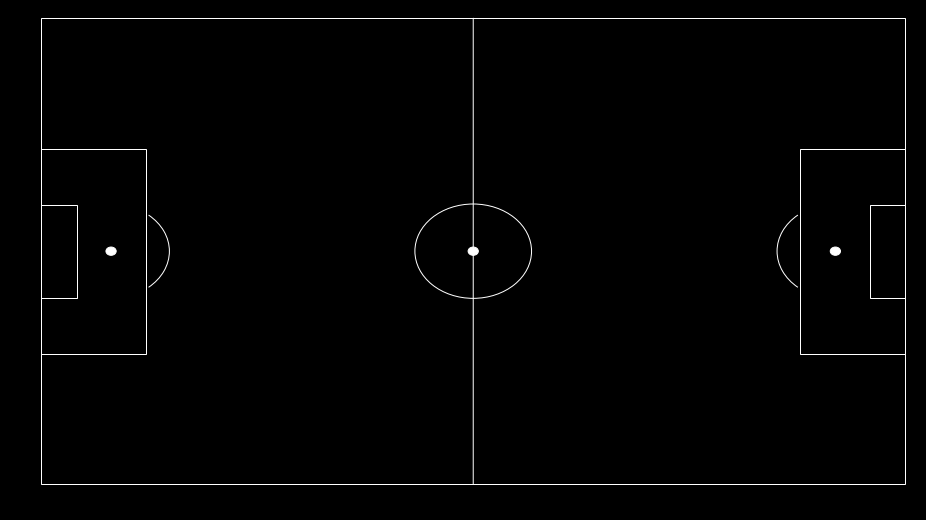

In [189]:
filenames_home = []
players = home_team_list #['Alisson Ramsés Becker','Fágner Conserva Lemos','Fernando Luiz Rosa','Gabriel Fernando de Jesus','João Miranda de Souza Filho','José Paulo Bezzera Maciel Júnior','Marcelo Vieira da Silva Júnior','Neymar da Silva Santos Junior','Philippe Coutinho Correia','Thiago Emiliano da Silva','Willian Borges da Silva']
fig=plt.figure() #set up the figures
from matplotlib import rcParams
plt.style.use('dark_background')
fig.set_size_inches(16,9)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
y_loc =0
timestamp = ['00:10:00:000','00:15:00:000','00:20:00:000','00:25:00:000','00:30:00:000','00:35:00:000','00:40:00:000','00:45:00:000','00:50:00:000']
time = 0
half =1
while (time < len(timestamp) ):
  for player in players:
      x_avg = 0
      y_avg = 0
      touches = 0
      if player  in players:
    #print(players[player])
          if time != 0:
            #print('YES.',timestamp[time])
            play_temp = pass_home[ (pass_home.timestamp > timestamp[time-1]) &  (pass_home.timestamp <= timestamp[time])]
          else:
            play_temp = pass_home[(pass_home.timestamp <= timestamp[time])]  
            
          play_temp = play_temp[(play_temp.player_name == player) & (play_temp.period == half)]
          
          if len(play_temp) != 0:
            for i in range(len(play_temp)):
                touches+=1
                #https://math.stackexchange.com/questions/1013230/how-to-find-coordinates-of-reflected-point
                #y_loc = (play_temp.iloc[i]['location'][1] + 40 ) %80
                y_loc = -2*(play_temp.iloc[i]['location'][1] - 40) + play_temp.iloc[i]['location'][1] 
                x_avg = x_avg + play_temp.iloc[i]['location'][0]
                y_avg = y_avg + y_loc
          if len(play_temp) != 0:      
            x_avg = x_avg/len(play_temp)
            y_avg = y_avg/len(play_temp)
      
            ax.scatter(x_avg, y_avg, s= (5 *touches ))  
            ax.annotate(player, (x_avg, y_avg))
  plt.text(50,-4,str(half)+' Half '+str(timestamp[time]),fontsize=20,color='#cb4154')        
  plt.savefig('home_image'+ str(half) + str(timestamp[time]) + str('.png'))
  filenames_home.append('home_image'+ str(half) + str(timestamp[time]) + str('.png'))
  plt.cla()
  time +=1
  if time == 8 and half ==1:
    time = 0
    half = 2
  #fig=plt.figure()
  plt.style.use('dark_background')
  fig.set_size_inches(16,9)
  ax=fig.add_subplot(1,1,1)
  draw_pitch(ax) #overlay our different objects on the pitch
  plt.ylim(-2, 82)
  plt.xlim(-2, 122)
  plt.axis('off')
  kargs = { 'duration': 2 }

import imageio
images = []
for filename in filenames_home:
  frame = 2*(i**0.5)  
  images.append(imageio.imread(filename))
imageio.mimsave('home.gif', images,**kargs)
#plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

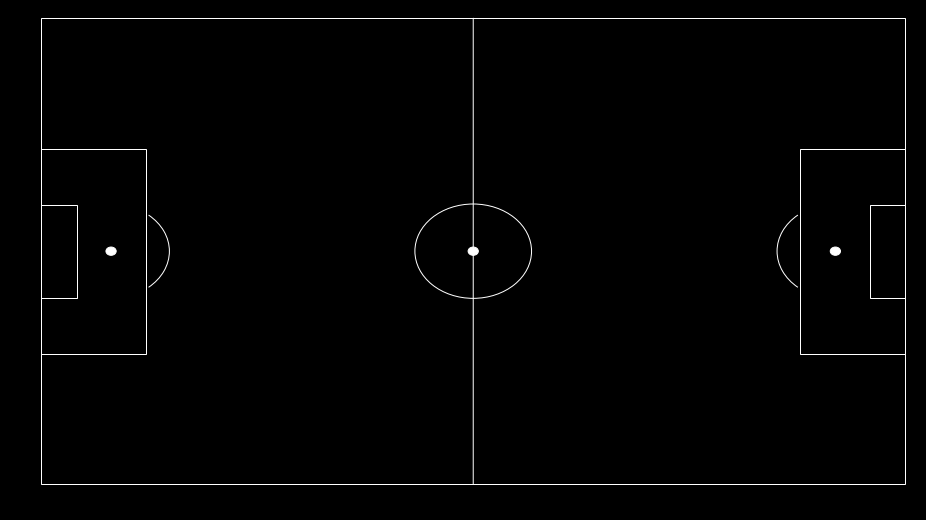

In [190]:
filenames_away = []
players = away_list #['Alisson Ramsés Becker','Fágner Conserva Lemos','Fernando Luiz Rosa','Gabriel Fernando de Jesus','João Miranda de Souza Filho','José Paulo Bezzera Maciel Júnior','Marcelo Vieira da Silva Júnior','Neymar da Silva Santos Junior','Philippe Coutinho Correia','Thiago Emiliano da Silva','Willian Borges da Silva']
fig=plt.figure() #set up the figures
from matplotlib import rcParams
plt.style.use('dark_background')
fig.set_size_inches(16,9)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
y_loc =0
timestamp = ['00:10:00:000','00:15:00:000','00:20:00:000','00:25:00:000','00:30:00:000','00:35:00:000','00:40:00:000','00:45:00:000','00:50:00:000']
time = 0
half =1
while (time < len(timestamp) ):
  for player in players:
      x_avg = 0
      y_avg = 0
      touches = 0
      if player  in players:
    #print(players[player])
          if time != 0:
            #print('YES.',timestamp[time])
            play_temp = pass_away[ (pass_away.timestamp > timestamp[time-1]) &  (pass_away.timestamp <= timestamp[time])]
          else:
            play_temp = pass_away[(pass_away.timestamp <= timestamp[time])]  
            
          play_temp = play_temp[(play_temp.player_name == player) & (play_temp.period == half)]
          #print(play_temp.player_name ,play_temp.timestamp)
          #print('\n')
          if len(play_temp) != 0:
            for i in range(len(play_temp)):
                touches+=1
                #y_loc = (play_temp.iloc[i]['location'][1] + 40 ) %80
                y_loc = -2*(play_temp.iloc[i]['location'][1] - 40) + play_temp.iloc[i]['location'][1] 
                x_avg = x_avg + play_temp.iloc[i]['location'][0]
                y_avg = y_avg + y_loc
          if len(play_temp) != 0:      
            x_avg = x_avg/len(play_temp)
            y_avg = y_avg/len(play_temp)
      #print(x_avg,y_avg,players[player])
            ax.scatter(x_avg, y_avg, s= (5 *touches ))  
            ax.annotate(player, (x_avg, y_avg))
  plt.text(50,-4,str(half)+' Half '+str(timestamp[time]),fontsize=20,color='#cb4154')        
  plt.savefig('away_image'+ str(half) + str(timestamp[time]) + str('.png'))
  filenames_away.append('away_image'+ str(half) + str(timestamp[time]) + str('.png'))
  plt.cla()
  time +=1
  if time == 8 and half ==1:
    time = 0
    half = 2
  #fig=plt.figure()
  plt.style.use('dark_background')
  fig.set_size_inches(16,9)
  ax=fig.add_subplot(1,1,1)
  draw_pitch(ax) #overlay our different objects on the pitch
  plt.ylim(-2, 82)
  plt.xlim(-2, 122)
  plt.axis('off')
  
kargs = { 'duration': 2 }
import imageio
images = []
for filename in filenames_away:
  frame = 2*(i**0.5)  
  images.append(imageio.imread(filename))
imageio.mimsave('away.gif', images,**kargs)

In [0]:
kargs = { 'duration': 2 }
import imageio
images = []
for filename in filenames:
  frame = 2*(i**0.5)  
  images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images,**kargs)